In [2]:
pip install lazypredict

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

**Dataset**

In [4]:
Diabetics_data=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [5]:
Diabetics_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


**Data Cleaning**

In [6]:
Diabetics_data.shape

(100000, 9)

In [7]:
Diabetics_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
Diabetics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
Diabetics_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.00,41.89,22.52,0.08,24.00,43.00,60.00,80.00
hypertension,100000.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.00,0.04,0.19,0.00,0.00,0.00,0.00,1.00
bmi,100000.00,27.32,6.64,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.00,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.00,138.06,40.71,80.00,100.00,140.00,159.00,300.00
diabetes,100000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


In [10]:
Diabetics_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
Diabetics_data.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [12]:
Diabetics_data.drop(Diabetics_data[Diabetics_data["age"] < 1].index,axis=0,inplace=True)


In [13]:
Diabetics_data.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  , 33.  , 16.  , 61.  ,
       31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  , 48.  , 51.  ,
       71.  , 64.  , 63.  , 52.  , 10.  , 35.  , 23.  ,  1.16,  1.64,
        1.88,  1.32,  1.24,  1.  ,  1.8 ,  1.56,  1.08,  1.4 ,  1.72,
        1.48])

**Data Preprocessing**

In [14]:
encode=OrdinalEncoder()
Diabetics_data["gender"]=encode.fit_transform(Diabetics_data[["gender"]])
Diabetics_data["smoking_history"]=encode.fit_transform(Diabetics_data[["smoking_history"]])

**EDA**

In [15]:
Diabetics_data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.00,-0.03,0.01,0.08,-0.08,-0.02,0.02,0.02,0.04
age,-0.03,1.00,0.25,0.23,0.22,0.32,0.10,0.11,0.26
hypertension,0.01,0.25,1.00,0.12,0.09,0.15,0.08,0.08,0.20
heart_disease,0.08,0.23,0.12,1.00,0.03,0.06,0.07,0.07,0.17
smoking_history,-0.08,0.22,0.09,0.03,1.00,0.17,0.04,0.04,0.09
bmi,-0.02,0.32,0.15,0.06,0.17,1.00,0.08,0.09,0.21
HbA1c_level,0.02,0.10,0.08,0.07,0.04,0.08,1.00,0.17,0.40
blood_glucose_level,0.02,0.11,0.08,0.07,0.04,0.09,0.17,1.00,0.42
diabetes,0.04,0.26,0.20,0.17,0.09,0.21,0.40,0.42,1.00


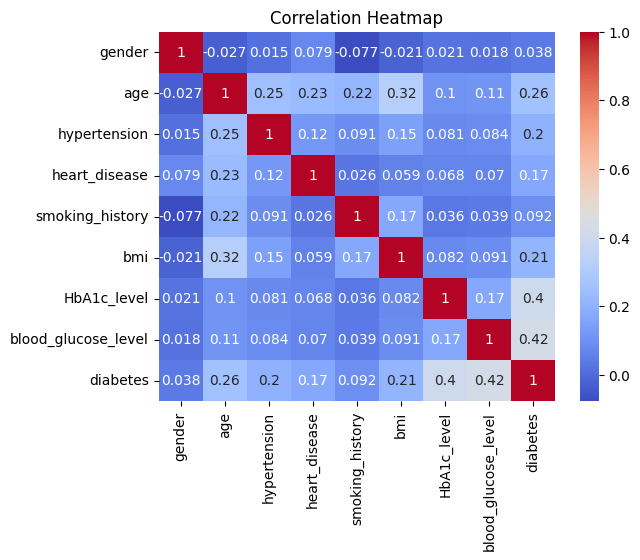

In [16]:
sns.heatmap(Diabetics_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


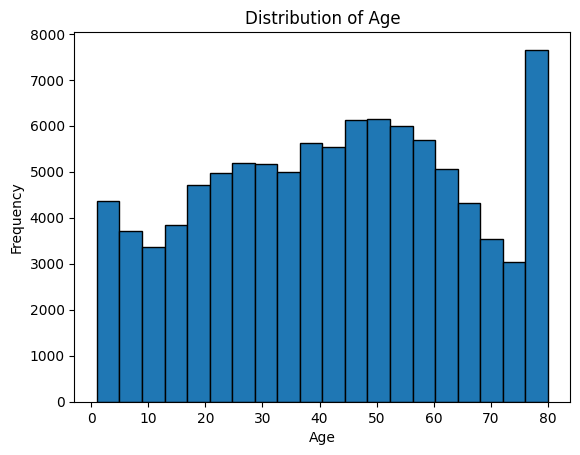

In [17]:
plt.hist(Diabetics_data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


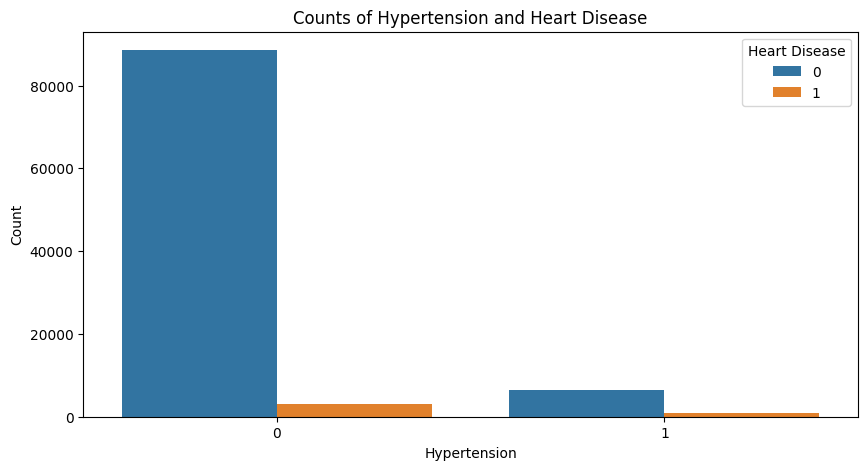

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hypertension', hue='heart_disease', data=Diabetics_data)
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Counts of Hypertension and Heart Disease')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

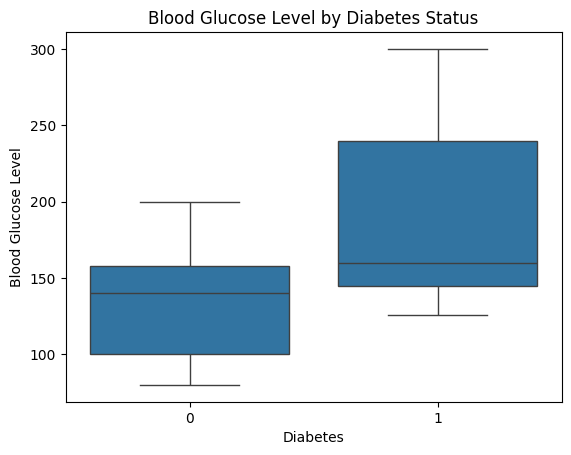

In [19]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=Diabetics_data)
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level by Diabetes Status')
plt.show()

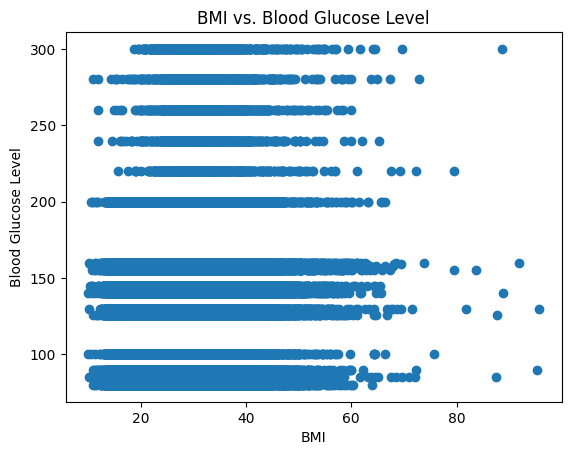

In [20]:
plt.scatter(Diabetics_data['bmi'], Diabetics_data['blood_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('BMI vs. Blood Glucose Level')
plt.show()

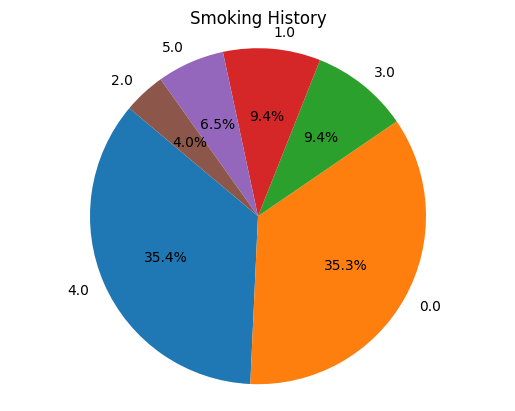

In [21]:
smoking_counts = Diabetics_data['smoking_history'].value_counts()
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoking History')
plt.axis('equal')
plt.show()

**Machine learning**

In [22]:
#spliting x and y
x=Diabetics_data.drop("diabetes",axis=1)
y=Diabetics_data["diabetes"]

In [23]:
#train and Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**Model Evaluation**

In [24]:
class Classification_models:
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
    def desiciontree(self):
        from sklearn.tree import DecisionTreeClassifier
        model=DecisionTreeClassifier().fit(x_train,y_train)
        y_pred=model.predict(x_test)
        acc=accuracy_score(y_test,y_pred)
        return acc
    def Randomforest(self):
        from sklearn.ensemble import RandomForestClassifier
        model1=RandomForestClassifier().fit(x_train,y_train)
        y_pred1=model1.predict(x_test)
        acc=accuracy_score(y_test,y_pred1)
        return acc
    def Adaboost(self):
        from sklearn.ensemble import AdaBoostClassifier
        model2=AdaBoostClassifier().fit(x_train,y_train)
        y_pred2=model2.predict(x_test)
        acc=accuracy_score(y_test,y_pred2)
        return acc
    def SGD(self):
        from sklearn.linear_model import SGDClassifier
        model3=SGDClassifier().fit(x_train,y_train)
        y_pred3=model3.predict(x_test)
        acc=accuracy_score(y_test,y_pred3)
        return acc
    def supportvector(self):
        from sklearn import svm
        model4=svm.SVC().fit(x_train,y_train)
        y_pred4=model4.predict(x_test)
        acc=accuracy_score(y_test,y_pred4)
        return acc
    def KNeighbors(self):
        from sklearn.neighbors import KNeighborsClassifier
        model5=KNeighborsClassifier().fit(x_train,y_train)
        y_pred5=model5.predict(x_test)
        acc=accuracy_score(y_test,y_pred5)
        return acc
    def NaiveBayes(self):
        from sklearn.naive_bayes import GaussianNB
        model6=GaussianNB().fit(x_train,y_train)
        y_pred6=model6.predict(x_test)
        acc=accuracy_score(y_test,y_pred6)
        return acc
    def Gradient(self):
        from sklearn.ensemble import GradientBoostingClassifier
        model7=GradientBoostingClassifier().fit(x_train,y_train)
        y_pred7=model7.predict(x_test)
        acc=accuracy_score(y_test,y_pred7)
        return acc
    def NearestCentroid(self):
        from sklearn.neighbors import NearestCentroid
        model8=NearestCentroid().fit(x_train,y_train)
        y_pred8=model8.predict(x_test)
        acc=accuracy_score(y_test,y_pred8)
        return acc
    def Neuralnetwork(self):
        from sklearn.neural_network import MLPClassifier
        model9=MLPClassifier().fit(x_train,y_train)
        y_pred9=model9.predict(x_test)
        acc=accuracy_score(y_test,y_pred9)
        return acc

In [29]:
model=Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores={
    "DecisionTree": model.desiciontree(),
    "Randomforest": model.Randomforest(),
    "Adaboost": model.Adaboost(),
    "SGD": model.SGD(),
    "supportvector": model.supportvector(),
    "KNeighbors": model.KNeighbors(),
    "NaiveBayes": model.NaiveBayes(),
    "Gradient": model.Gradient(),
    "NearestCentroid":model.NearestCentroid(),
    "Neuralnetwork":model.Neuralnetwork()}

In [30]:
accuracy_scores

{'DecisionTree': 0.9506721026924474,
 'Randomforest': 0.9702902353368587,
 'Adaboost': 0.9715415977071812,
 'SGD': 0.9511565010293465,
 'supportvector': 0.9469987486376297,
 'KNeighbors': 0.9525693295119687,
 'NaiveBayes': 0.9048560933274129,
 'Gradient': 0.972147095628305,
 'NearestCentroid': 0.8518548419650426,
 'Neuralnetwork': 0.9611673999919267}

In [32]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier().fit(x_train,y_train)
y_pred1=model1.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9704920679772333

In [34]:
confusion=confusion_matrix(y_test,y_pred1)
confusion

array([[22564,    73],
       [  658,  1478]])

In [37]:
report = classification_report(y_test, y_pred1)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22637
           1       0.95      0.69      0.80      2136

    accuracy                           0.97     24773
   macro avg       0.96      0.84      0.89     24773
weighted avg       0.97      0.97      0.97     24773



**Hyper Tuning**

In [40]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(criterion="entropy").fit(x_train,y_train)
y_pred1=model1.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9702498688087837

In [44]:
max_depths = [estimator.tree_.max_depth for estimator in model1.estimators_]
print(max(max_depths))

38


In [45]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(criterion="entropy",max_depth=30).fit(x_train,y_train)
y_pred1=model1.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9706535340895329

**Covid DataSet Prediction**

In [49]:
covid_data=pd.read_csv("/content/Covid Dataset.csv")

In [50]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


**Data Cleaning**

In [51]:
covid_data.shape

(5434, 21)

In [52]:
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [53]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [54]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [55]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [58]:
	covid_data["Breathing Problem"].value_counts()

Breathing Problem
Yes    3620
No     1814
Name: count, dtype: int64

In [56]:
covid_data.isnull().sum() # missing values



Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

**Pre processing**

In [60]:
covid_data['Breathing Problem']=encode.fit_transform(covid_data[['Breathing Problem']])
covid_data['Fever']=encode.fit_transform(covid_data[['Fever']])
covid_data['Dry Cough']=encode.fit_transform(covid_data[['Dry Cough']])
covid_data['Sore throat']=encode.fit_transform(covid_data[['Sore throat']])
covid_data['Running Nose']=encode.fit_transform(covid_data[['Running Nose']])
covid_data['Asthma']=encode.fit_transform(covid_data[['Asthma']])
covid_data['Chronic Lung Disease']=encode.fit_transform(covid_data[['Chronic Lung Disease']])
covid_data['Headache']=encode.fit_transform(covid_data[['Headache']])
covid_data['Heart Disease']=encode.fit_transform(covid_data[['Heart Disease']])
covid_data['Diabetes']=encode.fit_transform(covid_data[['Diabetes']])
covid_data['Hyper Tension']=encode.fit_transform(covid_data[['Hyper Tension']])
covid_data['Abroad travel']=encode.fit_transform(covid_data[['Abroad travel']])
covid_data['Contact with COVID Patient']=encode.fit_transform(covid_data[['Contact with COVID Patient']])
covid_data['Attended Large Gathering']=encode.fit_transform(covid_data[['Attended Large Gathering']])
covid_data['Visited Public Exposed Places']=encode.fit_transform(covid_data[['Visited Public Exposed Places']])
covid_data['Family working in Public Exposed Places']=encode.fit_transform(covid_data[['Family working in Public Exposed Places']])
covid_data['Wearing Masks']=encode.fit_transform(covid_data[['Wearing Masks']])
covid_data['Sanitization from Market']=encode.fit_transform(covid_data[['Sanitization from Market']])
covid_data['COVID-19']=encode.fit_transform(covid_data[['COVID-19']])
covid_data['Dry Cough']=encode.fit_transform(covid_data[['Dry Cough']])
covid_data['Sore throat']=encode.fit_transform(covid_data[['Sore throat']])
covid_data['Gastrointestinal ']=encode.fit_transform(covid_data[['Gastrointestinal ']])
covid_data['Fatigue ']=encode.fit_transform(covid_data[['Fatigue ']])

In [61]:
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00
1,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
2,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,...,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,...,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
4,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00


In [64]:
covid_data["Wearing Masks"].value_counts()

Wearing Masks
0.00    5434
Name: count, dtype: int64

In [66]:
covid_data=covid_data.drop('Wearing Masks',axis=1)
covid_data=covid_data.drop('Sanitization from Market',axis=1)

In [67]:
covid_data.corr()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.00,0.09,0.16,0.30,0.06,0.08,-0.10,-0.06,-0.07,0.06,0.05,0.00,-0.08,0.12,0.21,0.20,0.07,0.02,0.44
Fever,0.09,1.00,0.13,0.32,0.08,0.07,-0.03,-0.04,-0.03,0.05,0.08,-0.06,-0.01,0.13,0.16,0.07,0.00,0.01,0.35
Dry Cough,0.16,0.13,1.00,0.21,-0.03,0.09,-0.04,-0.04,0.05,-0.01,0.08,-0.04,0.01,0.33,0.13,0.12,0.09,0.16,0.46
Sore throat,0.30,0.32,0.21,1.00,0.04,0.08,-0.05,-0.02,0.00,0.00,0.04,-0.02,0.03,0.21,0.19,0.22,0.08,0.10,0.50
Running Nose,0.06,0.08,-0.03,0.04,1.00,-0.02,-0.01,0.07,-0.06,0.04,-0.02,0.01,-0.01,0.03,0.00,0.06,0.03,-0.06,-0.01
Asthma,0.08,0.07,0.09,0.08,-0.02,1.00,-0.03,0.04,0.08,-0.01,0.02,0.01,0.10,0.07,0.01,-0.04,0.02,-0.12,0.09
Chronic Lung Disease,-0.10,-0.03,-0.04,-0.05,-0.01,-0.03,1.00,-0.05,-0.04,0.05,-0.01,-0.05,-0.05,-0.09,-0.06,-0.02,-0.09,0.04,-0.06
Headache,-0.06,-0.04,-0.04,-0.02,0.07,0.04,-0.05,1.00,0.05,0.03,-0.21,0.05,0.10,0.04,-0.08,-0.16,-0.01,-0.01,-0.03
Heart Disease,-0.07,-0.03,0.05,0.00,-0.06,0.08,-0.04,0.05,1.00,-0.03,0.05,-0.06,0.00,-0.02,-0.03,-0.05,0.09,0.03,0.03
Diabetes,0.06,0.05,-0.01,0.00,0.04,-0.01,0.05,0.03,-0.03,1.00,0.04,-0.04,0.04,0.04,-0.09,-0.06,-0.08,0.10,0.04


**EDA**

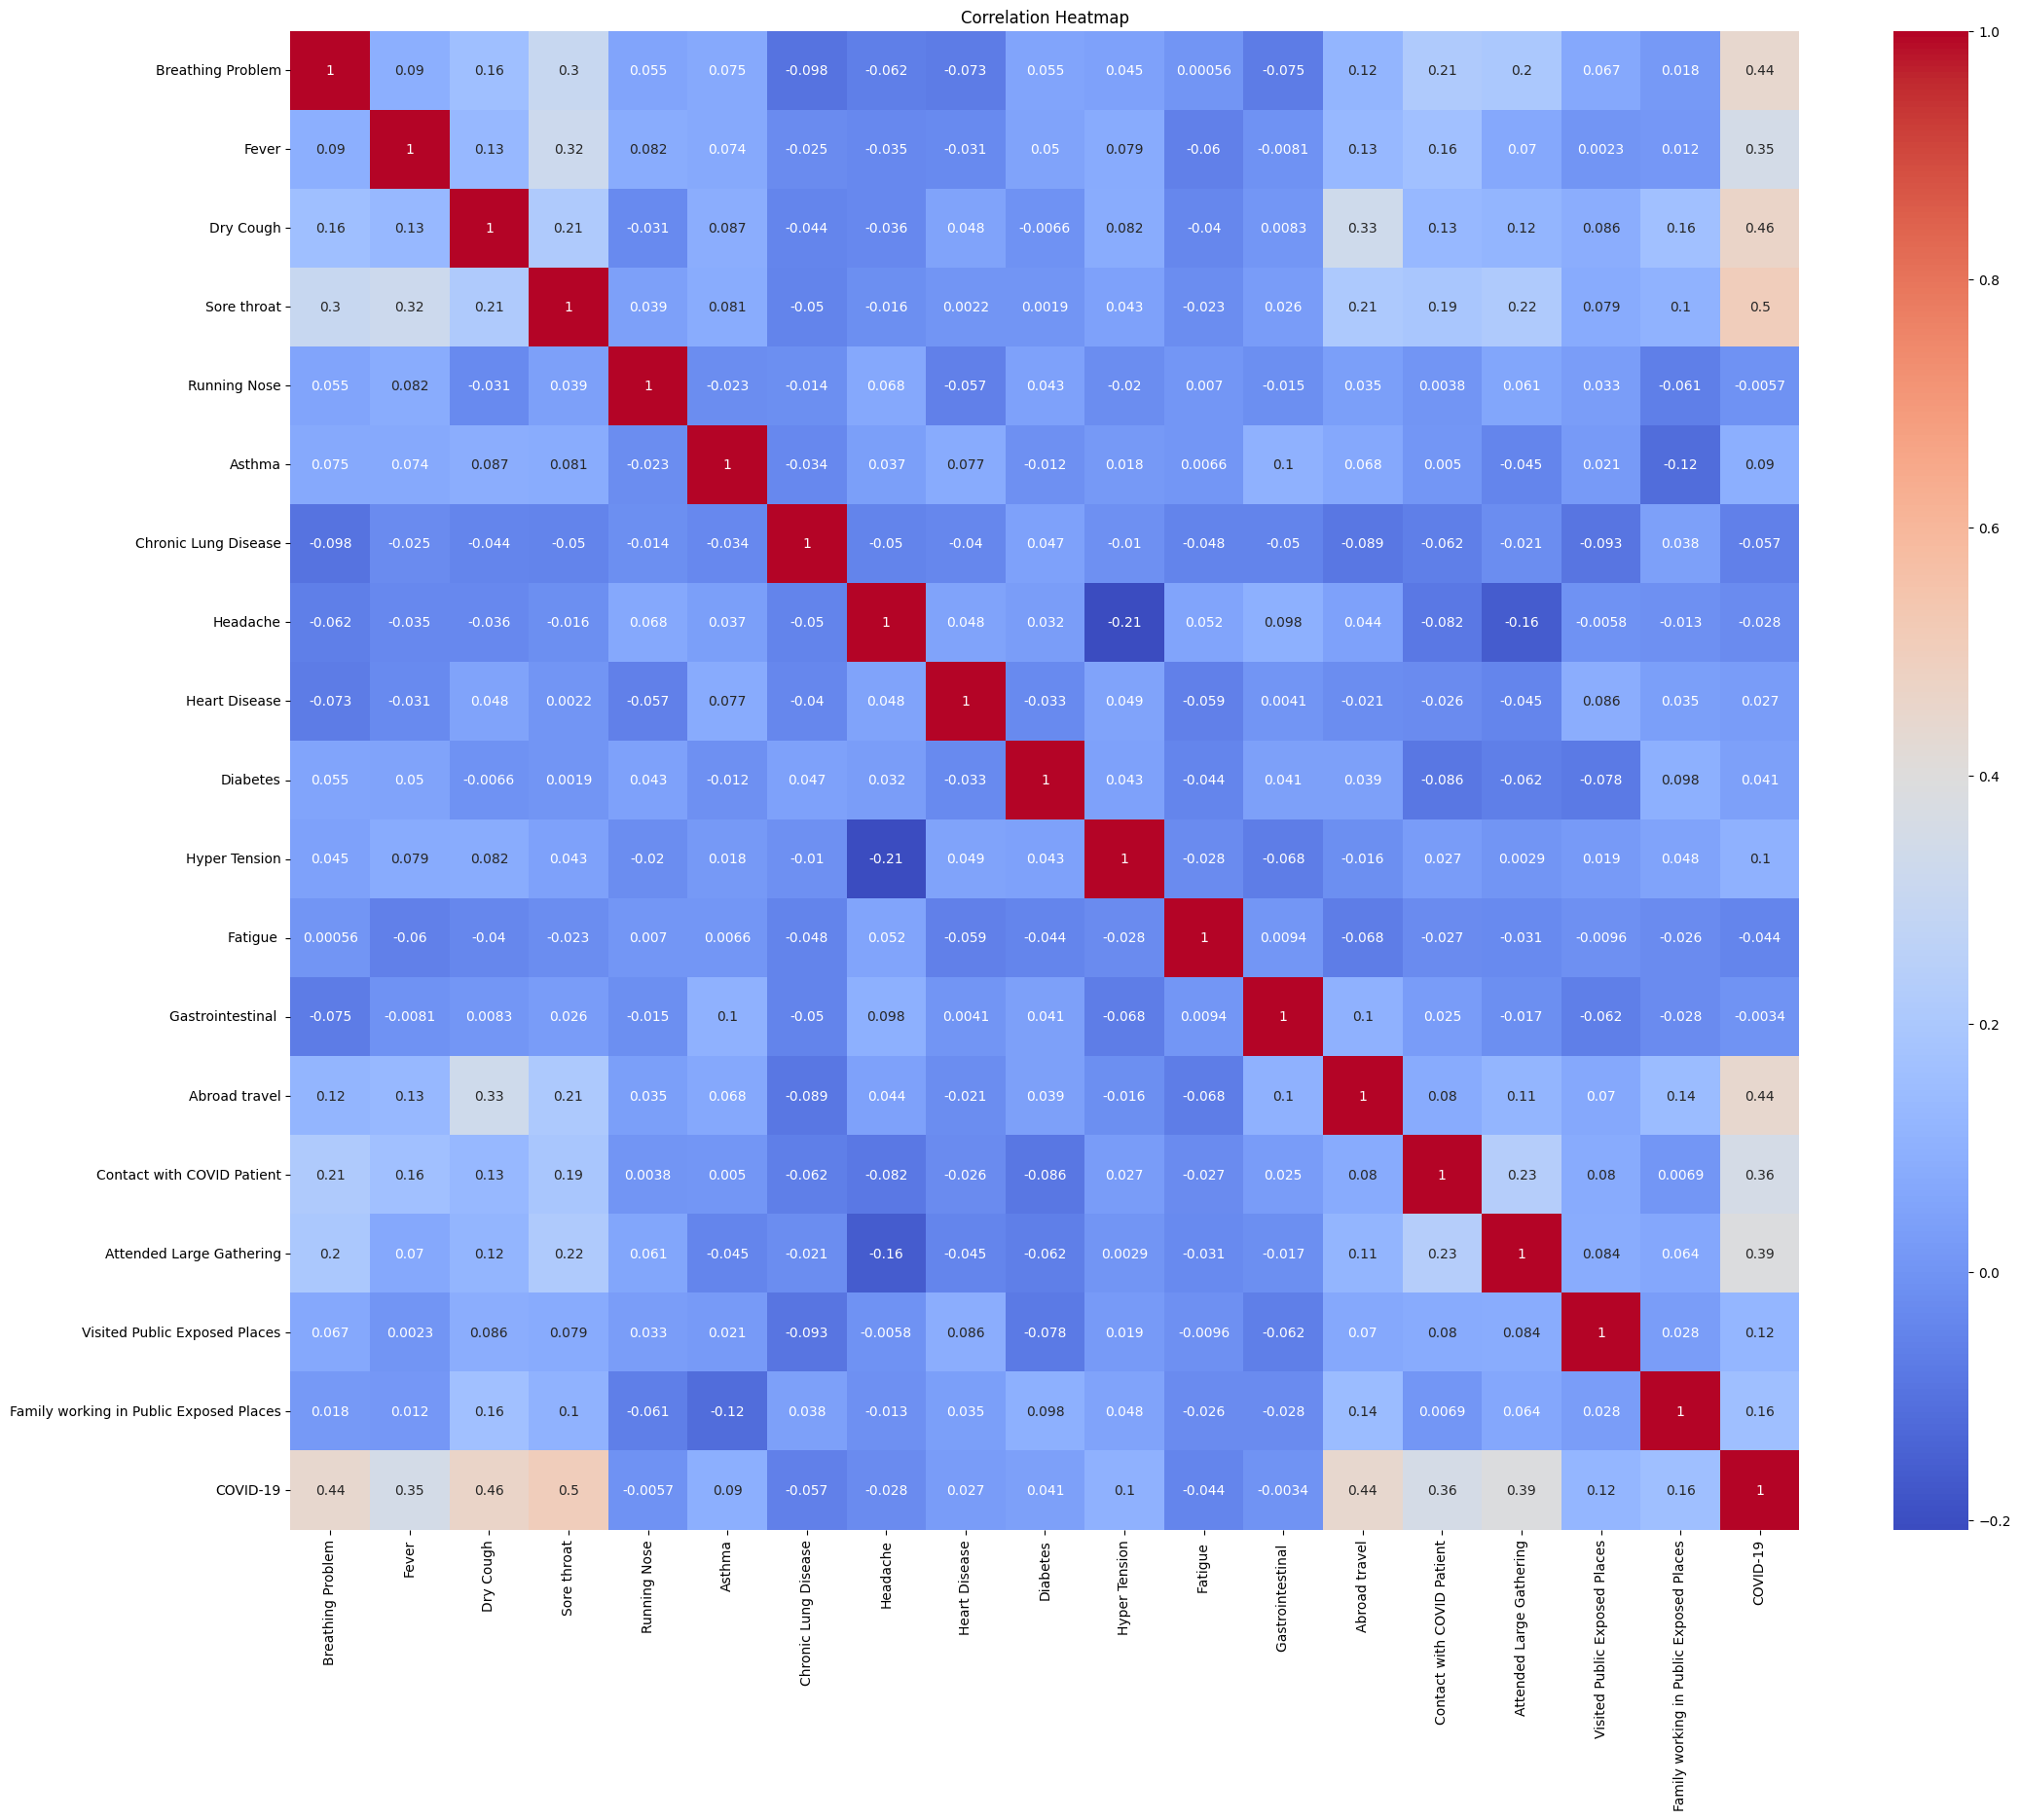

In [69]:
plt.figure(figsize=(25,20))
sns.heatmap(covid_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

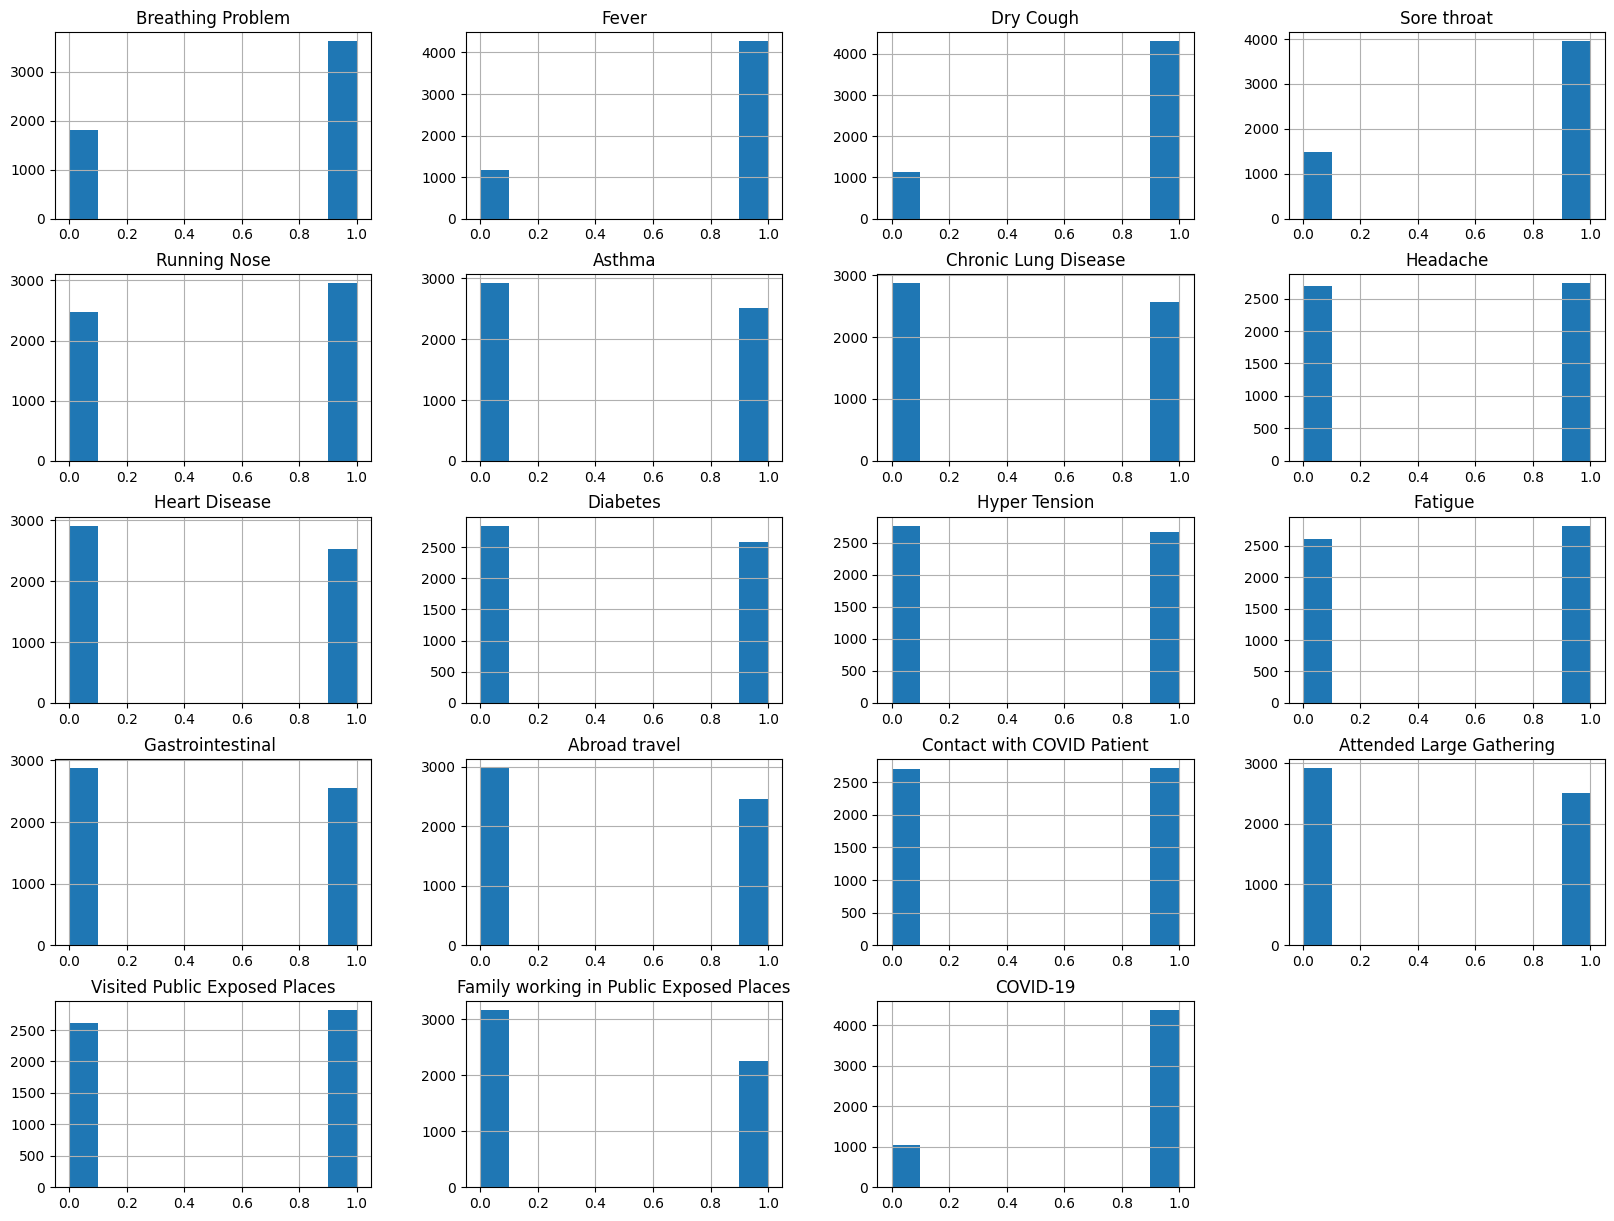

In [70]:
covid_data.hist(figsize=(20,15));

In [72]:
x1=covid_data.drop('COVID-19',axis=1)
y1=covid_data['COVID-19']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.20)

In [73]:
model_covid=Classification_models(x_train1,x_test1,y_train1,y_test1)
accuracy_scores={
    "DecisionTree": model.desiciontree(),
    "Randomforest": model.Randomforest(),
    "Adaboost": model.Adaboost(),
    "SGD": model.SGD(),
    "supportvector": model.supportvector(),
    "KNeighbors": model.KNeighbors(),
    "NaiveBayes": model.NaiveBayes(),
    "Gradient": model.Gradient(),
    "NearestCentroid":model.NearestCentroid(),
    "Neuralnetwork":model.Neuralnetwork()}

In [74]:
accuracy_scores

{'DecisionTree': 0.9825206991720331,
 'Randomforest': 0.9825206991720331,
 'Adaboost': 0.9659613615455381,
 'SGD': 0.9678012879484821,
 'supportvector': 0.9825206991720331,
 'KNeighbors': 0.9751609935602575,
 'NaiveBayes': 0.7405703771849126,
 'Gradient': 0.9779208831646734,
 'NearestCentroid': 0.9365225390984361,
 'Neuralnetwork': 0.9825206991720331}

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_covid_data=DecisionTreeClassifier().fit(x_train1,y_train1)
y_pred_covid=model_covid_data.predict(x_test1)
accuracy_score(y_test1,y_pred_covid)

0.983440662373505

In [78]:
confusion=confusion_matrix(y_test1,y_pred_covid)
confusion

array([[215,   8],
       [ 10, 854]])

In [79]:
report = classification_report(y_test1, y_pred_covid)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       223
         1.0       0.99      0.99      0.99       864

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087



In [81]:
max_depth = model_covid_data.tree_.max_depth
print(max_depth)

11


In [84]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion="entropy",max_depth=7).fit(x_train1,y_train1)
y_pred_covid_1=model1.predict(x_test1)
accuracy_score(y_test1,y_pred_covid_1)

0.9696412143514259